In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV
import warnings

warnings.filterwarnings('ignore')

# Input data files are available in the read-only directory
# Read and list all files in the current directory
import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset (train.csv in the current directory)
train_df = pd.read_csv('/content/train.csv')  # Ensure the correct path is given to the dataset

# Show the first few rows of the dataset to check
print(train_df.head())


/content/train.csv
/content/test.csv
/content/.config/.last_survey_prompt.yaml
/content/.config/active_config
/content/.config/config_sentinel
/content/.config/default_configs.db
/content/.config/gce
/content/.config/.last_opt_in_prompt.yaml
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/.last_update_check.json
/content/.config/configurations/config_default
/content/.config/logs/2024.11.12/14.24.52.621628.log
/content/.config/logs/2024.11.12/14.24.39.246967.log
/content/.config/logs/2024.11.12/14.24.25.007244.log
/content/.config/logs/2024.11.12/14.24.37.929705.log
/content/.config/logs/2024.11.12/14.24.51.887054.log
/content/.config/logs/2024.11.12/14.24.02.900650.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv
   Gender  Age  openness  ne

In [ ]:
import pandas as pd

# Load the datasets
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

# Renaming columns for consistency
df_train.rename(columns={'Personality (Class label)': 'Personality'}, inplace=True)
df_test.rename(columns={'Personality (class label)': 'Personality'}, inplace=True)

# Concatenate the datasets
df = pd.concat([df_train, df_test], ignore_index=True)  # reset index

# Show the first few rows to confirm everything is correct
print(df.head())

# Check the length of the concatenated dataset
train_length = len(df_train)
print(f"Length of training data: {train_length}")


   Gender  Age  openness  neuroticism  conscientiousness  agreeableness  \
0    Male   17         7            4                  7              3   
1    Male   19         4            5                  4              6   
2  Female   18         7            6                  4              5   
3  Female   22         5            6                  7              4   
4  Female   19         7            4                  6              5   

   extraversion  Personality  
0             2  extraverted  
1             6      serious  
2             5   dependable  
3             3  extraverted  
4             4       lively  
Length of training data: 709


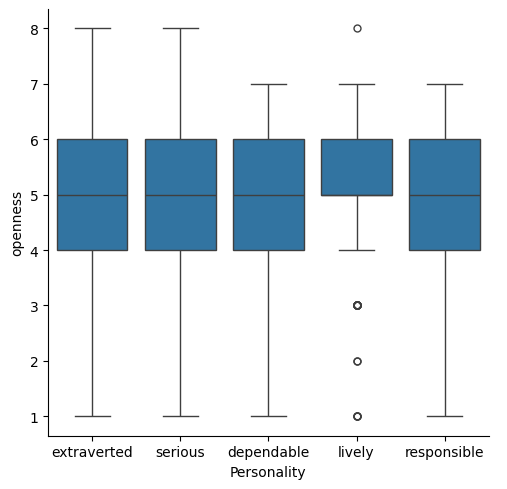

In [ ]:
sns.catplot(x="Personality", y="openness", kind="box", data=df)

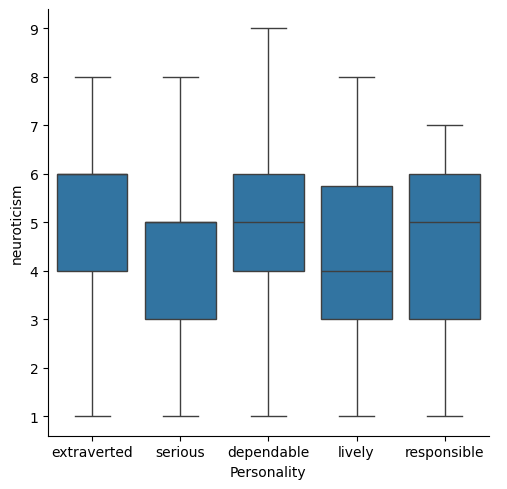

In [ ]:
sns.catplot(x="Personality", y="neuroticism", kind="box", data=df)

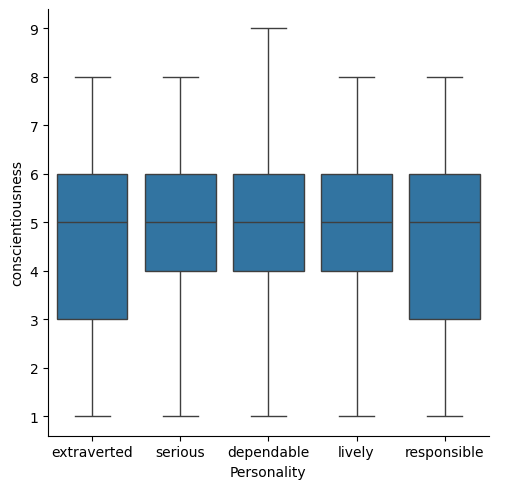

In [ ]:
sns.catplot(x="Personality", y="conscientiousness", kind="box", data=df)

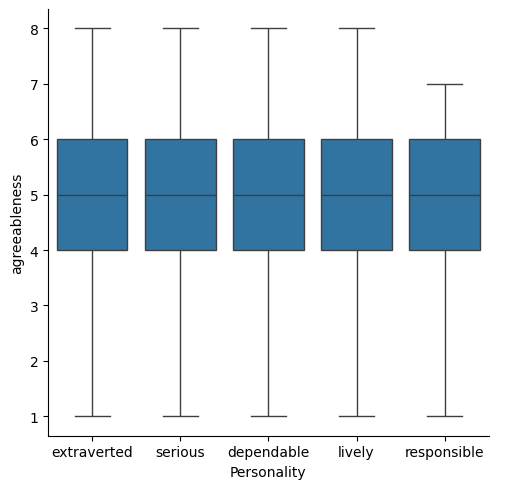

In [ ]:
sns.catplot(x="Personality", y="agreeableness", kind="box", data=df)

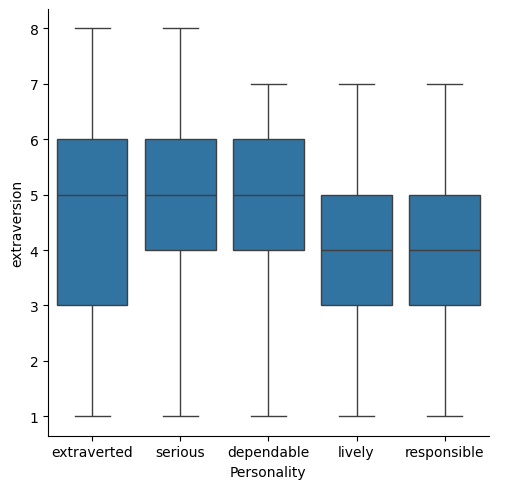

In [ ]:
sns.catplot(x="Personality", y="extraversion", kind="box", data=df)

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0,
                                 'Female': 1})

df['Personality'] = df['Personality'].map({'dependable': 0,
                                           'extraverted': 1,
                                           'lively': 2,
                                           'responsible': 3,
                                           'serious': 4})

In [ ]:
df[df.isnull().sum(axis=1) > 0]

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
449,NaN,21,2,5,6,1,5,4


In [ ]:
df.groupby(by=['Personality', 'Age']).mean().loc[4]

,Gender,openness,neuroticism,conscientiousness,agreeableness,extraversion
Age,,,,,,
17,0.375000,4.916667,4.208333,5.041667,4.291667,5.375000
18,0.531250,5.000000,4.656250,5.109375,4.968750,4.843750
19,0.506024,4.710843,4.253012,4.433735,5.228916,5.156627
20,0.250000,4.975000,4.225000,5.200000,4.925000,4.825000
21,0.406250,4.575758,4.424242,5.030303,5.030303,5.030303
22,0.476190,5.142857,4.190476,4.619048,5.095238,4.476190
23,0.133333,4.466667,4.133333,4.933333,5.000000,5.000000
24,0.400000,4.866667,4.466667,5.133333,3.933333,5.666667
25,0.500000,5.125000,3.875000,5.375000,4.625000,5.250000


In [ ]:
df.at[449, 'Gender'] = 0

<Axes: >

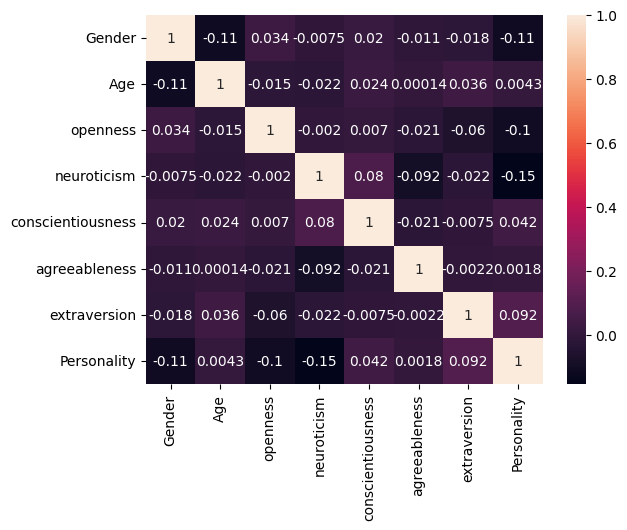

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.skew()

,0
Gender,-0.093991
Age,0.471614
openness,-0.638642
neuroticism,-0.412167
conscientiousness,-0.412381
agreeableness,-0.552094
extraversion,-0.359830
Personality,-0.140035


In [ ]:
df['openness'] = np.sqrt(df['openness'] + 1)  # Apply square root to each value
df['agreeableness'] = np.sqrt(df['agreeableness'] + 1)  # Apply square root to each value


In [ ]:
# Splitting the data back into train and test sets
df_train = df[:train_length]
df_test = df[train_length:]

# Separating the features (X) and target (Y) columns for both training and testing sets
Y, X = df_train['Personality'], df_train.drop(columns=['Personality'])
Y_test, X_test = df_test['Personality'], df_test.drop(columns=['Personality'])

# Identifying numeric columns for scaling
numeric_columns = X.select_dtypes(include=[np.number]).columns

# Scaling only the numeric columns using RobustScaler
scaler = RobustScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


In [ ]:
df_train['Personality'].value_counts() / len(df_train)

,count
Personality,
4,0.227080
1,0.211566
0,0.194640
2,0.188999
3,0.177715


In [ ]:
df_test['Personality'].value_counts() / len(df_test)

,count
Personality,
4,0.485714
1,0.244444
3,0.126984
2,0.076190
0,0.066667


In [ ]:
param_grids = {}
models = []

logistic = LogisticRegression()
models.append(logistic)
param_grids[logistic] = {'C':np.arange(0.01, 1, 0.01)}

svc = SVC()
models.append(svc)
param_grids[svc] = {'kernel':['poly','rbf'],
                    'C':np.arange(0.01, 1, 0.01)}

models.append(svc)
param_grids[svc] = {'kernel':['poly','rbf'],
                    'C':np.arange(0.01, 1, 0.01)}

adaboost = AdaBoostClassifier()
models.append(adaboost)
param_grids[adaboost] = {'n_estimators':np.arange(10, 101, 10)}

knn = KNeighborsClassifier()
models.append(knn)
param_grids[knn] = {'n_neighbors':np.arange(2,11,1),
                    'weights':['uniform', 'distance'],
                    'p':np.arange(1,4,1)}

In [ ]:
from sklearn.model_selection import GridSearchCV

def choose_hyperparameters(models, param_grids, X, Y):
    cv_models = {}
    scores = {}
    cv_with_scores = {}

    for model_name, model in models.items():
        # Initialize GridSearchCV with the model and its corresponding parameter grid
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy')

        # Fit the model
        grid_search.fit(X, Y)

        # Save the best estimator, best score, and best parameters
        cv_models[model_name] = grid_search.best_estimator_
        scores[model_name] = grid_search.best_score_
        cv_with_scores[model_name] = {
            'best_score': grid_search.best_score_,
            'best_params': grid_search.best_params_
        }

    return cv_models, scores, cv_with_scores


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

# Function to relabel the personality
def relabel_personality(x):
    if x == 0 or x == 3:
        return 1
    else:
        return 0

# Vectorize the function to apply to all elements
relabel_personality_v = np.vectorize(relabel_personality)

# Apply relabeling to Y and Y_test
Y = relabel_personality_v(Y)
Y_test = relabel_personality_v(Y_test)

# Check for missing values in X and Y before proceeding
if np.any(np.isnan(X)) or np.any(np.isnan(Y)):
    print("Warning: There are missing values in the data. Please handle them before proceeding.")
else:
    # Define models and parameter grids
    param_grids = {}
    models = []

    logistic = LogisticRegression()
    models.append(logistic)
    param_grids[logistic] = {'C': np.arange(0.01, 1, 0.01)}

    svc = SVC()
    models.append(svc)
    param_grids[svc] = {'kernel': ['poly', 'rbf'],
                        'C': np.arange(0.01, 1, 0.01)}

    adaboost = AdaBoostClassifier()
    models.append(adaboost)
    param_grids[adaboost] = {'n_estimators': np.arange(10, 101, 10)}

    knn = KNeighborsClassifier()
    models.append(knn)
    param_grids[knn] = {'n_neighbors': np.arange(2, 11, 1),
                        'weights': ['uniform', 'distance'],
                        'p': np.arange(1, 4, 1)}

    # Function to choose hyperparameters using GridSearchCV
    def choose_hyperparameters(models, param_grids, X_train, Y_train):
        cv_models = {}
        scores = {}
        cv_with_scores = {}

        for model in models:
            label = str(type(model)).split('.')[-1].split("'")[0]
            try:
                gs = GridSearchCV(model, param_grid=param_grids[model], cv=StratifiedKFold(5), error_score='raise')
                gs.fit(X_train, Y_train)

                cv_models[label] = gs
                scores[label] = gs.best_score_  # Store the best score for the model
                cv_with_scores[label] = {'best_score': gs.best_score_, 'best_params': gs.best_params_}  # Store both score and params
            except ValueError as e:
                print(f"Error fitting {label}: {e}")

        return cv_models, scores, cv_with_scores

    # Call function to get hyperparameters and scores
    cv_models, scores, cv_with_scores = choose_hyperparameters(models, param_grids, X, Y)
    print(scores)


{'LogisticRegression': 0.6290580361602238, 'SVC': 0.6276495854559985, 'AdaBoostClassifier': 0.6248326840475477, 'KNeighborsClassifier': 0.6192088702427331}


In [ ]:
def get_oof_predictions(model, X_train, Y_train, kf):
    m = len(X_train)
    oof_predictions = np.empty((m,))
    for train_index, val_index in kf.split(X_train):
        X_tr, X_val = X[train_index], X[val_index]
        Y_tr = Y[train_index]
        model.fit(X_tr, Y_tr)
        oof_predictions[val_index] = model.predict(X_val)
    return oof_predictions

def train_metamodel(metamodels, param_grids, models, X_train, Y_train, k):
    m = len(X_train)
    kf = KFold(n_splits=k)
    models_predictions = np.zeros(m)
    for model in models:
        oof_predictions = get_oof_predictions(model, X_train, Y_train, kf)
        models_predictions = np.column_stack((models_predictions, oof_predictions))
    models_predictions = models_predictions[:, 1:]
    cv_models, scores, cv_with_scores = choose_hyperparameters(metamodels,
                                                               param_grids,
                                                               models_predictions,
                                                               Y_train)
    metamodel = max(cv_with_scores, key=cv_with_scores.get)
    return metamodel

def predict_with_models(models, X):
    m = len(X)
    models_predictions = np.zeros(m)
    for model in models:
        model_predictions = model.predict(X)
        models_predictions = np.column_stack((models_predictions, model_predictions))
    return models_predictions[:, 1:]

In [ ]:
metamodels = models.copy()
models = list(cv_models.values())
metamodel = train_metamodel(metamodels, param_grids, models, X, Y, 5)
Y_pred = predict_with_models(models, X_test)
metamodel_test_score = metamodel.score(Y_pred, Y_test)
metamodel_test_score

TypeError: '>' not supported between instances of 'dict' and 'dict'

In [ ]:
metamodel.best_score_

0.6304764758765359

In [ ]:
np.unique(Y_test, return_counts = True)

(array([0, 1]), array([254,  61]))

In [ ]:
np.unique(metamodel.predict(Y_pred), return_counts = True)

(array([0, 1]), array([313,   2]))

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming you have the following variables defined:
# models: list of trained models
# X_test: test feature set
# Y_test: true labels for the test set

# Dictionary to store accuracy results
accuracy_results = {}

# Loop through each model, make predictions, and calculate accuracy
for model in models:
    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, predictions)

    # Store accuracy in the results dictionary
    accuracy_results[str(type(model)).split('.')[-1].split("'")[0]] = accuracy

# Print the accuracy results
for model_name, acc in accuracy_results.items():
    print(f'{model_name} Accuracy: {acc:.4f}')


GridSearchCV Accuracy: 0.7429


In [ ]:
import joblib
import numpy as np
from sklearn.datasets import load_iris  # Example dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load dataset
data = load_iris()
X = data.data   # Features
Y = data.target  # Labels

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model on the training data
logistic_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = logistic_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Print the metrics
print(f'Logistic Regression Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
joblib.dump(logistic_model, 'logistic_model.pkl')  # Save the model


Logistic Regression Accuracy: 0.9667
Precision: 0.9708
Recall: 0.9667
F1 Score: 0.9671
Confusion Matrix:
[[11  0  0]
 [ 0  7  0]
 [ 0  1 11]]


['logistic_model.pkl']

In [ ]:
import joblib
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load dataset
data = datasets.load_iris()
X = data.data
Y = data.target

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=43)

# Train SVC model
svc_model = SVC(kernel='rbf', C=1.0)
svc_model.fit(X_train, Y_train)

# Make predictions
Y_pred = svc_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Precision
precision = precision_score(Y_test, Y_pred, average='weighted')
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(Y_test, Y_pred, average='weighted')
print(f'Recall: {recall:.4f}')

# F1 Score
f1 = f1_score(Y_test, Y_pred, average='weighted')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(cm)

# Classification Report
report = classification_report(Y_test, Y_pred)
print('Classification Report:')
print(report)

joblib.dump(svc_model, 'svc_model.pkl')


Accuracy: 0.9333
Precision: 0.9467
Recall: 0.9333
F1 Score: 0.9329
Confusion Matrix:
[[13  0  0]
 [ 0  8  0]
 [ 0  2  7]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.80      1.00      0.89         8
           2       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



['svc_model.pkl']

In [ ]:
import joblib
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load dataset
data = datasets.load_iris()  # You can replace this with any other dataset
X = data.data   # Features
Y = data.target  # Labels

# Split dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=43)

# Initialize AdaBoost with a default base estimator (DecisionTreeClassifier by default)
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the model on training data
ada_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = ada_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'AdaBoost Accuracy: {accuracy:.4f}')

# Calculate precision
precision = precision_score(Y_test, Y_pred, average='weighted')
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(Y_test, Y_pred, average='weighted')
print(f'Recall: {recall:.4f}')

# Calculate F1 score
f1 = f1_score(Y_test, Y_pred, average='weighted')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(cm)

# Classification Report
report = classification_report(Y_test, Y_pred)
print('Classification Report:')
print(report)

joblib.dump(ada_model, 'ada_model.pkl')

AdaBoost Accuracy: 0.9000
Precision: 0.9032
Recall: 0.9000
F1 Score: 0.9000
Confusion Matrix:
[[13  0  0]
 [ 0  7  1]
 [ 0  2  7]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.78      0.88      0.82         8
           2       0.88      0.78      0.82         9

    accuracy                           0.90        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.90      0.90      0.90        30



['ada_model.pkl']

In [ ]:
import joblib
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load dataset
data = datasets.load_iris()  # You can replace this with any other dataset
X = data.data   # Features
Y = data.target  # Labels

# Split dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

# Initialize KNN with 5 neighbors (default)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on training data
knn_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'KNN Accuracy: {accuracy:.4f}')

# Calculate precision
precision = precision_score(Y_test, Y_pred, average='weighted')
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(Y_test, Y_pred, average='weighted')
print(f'Recall: {recall:.4f}')

# Calculate F1 score
f1 = f1_score(Y_test, Y_pred, average='weighted')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(cm)

# Classification Report
report = classification_report(Y_test, Y_pred)
print('Classification Report:')
print(report)
joblib.dump(knn_model, 'knn_model.pkl')

KNN Accuracy: 0.9667
Precision: 0.9708
Recall: 0.9667
F1 Score: 0.9671
Confusion Matrix:
[[11  0  0]
 [ 0  7  0]
 [ 0  1 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



['knn_model.pkl']

In [ ]:
# Step 1: Load your training and testing datasets
df_train = pd.read_csv('/content/train.csv')  # Replace with your training dataset file
df_test = pd.read_csv('/content/test.csv')    # Replace with your test dataset file

# Standardize column names to lowercase and remove extra spaces for consistency
df_train.columns = df_train.columns.str.lower().str.replace(' ', '')
df_test.columns = df_test.columns.str.lower().str.replace(' ', '')

# Check if columns are standardized
print("Training Data Columns:", df_train.columns)
print("Testing Data Columns:", df_test.columns)

# Step 2: Prepare the training and testing data
X_train = df_train[['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism']].values
y_train = df_train['personality(classlabel)'].values  # Unified column name

X_test = df_test[['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism']].values
y_test = df_test['personality(classlabel)'].values  # Unified column name

# Continue with the rest of your code...


Training Data Columns: Index(['gender', 'age', 'openness', 'neuroticism', 'conscientiousness',
       'agreeableness', 'extraversion', 'personality(classlabel)'],
      dtype='object')
Testing Data Columns: Index(['gender', 'age', 'openness', 'neuroticism', 'conscientiousness',
       'agreeableness', 'extraversion', 'personality(classlabel)'],
      dtype='object')


In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Load the training and testing datasets
df_train = pd.read_csv('/content/train.csv')  # Replace with your training dataset file
df_test = pd.read_csv('/content/test.csv')    # Replace with your test dataset file

# Standardize column names to lowercase and remove extra spaces for consistency
df_train.columns = df_train.columns.str.lower().str.replace(' ', '')
df_test.columns = df_test.columns.str.lower().str.replace(' ', '')

# Prepare the training and testing data
X_train = df_train[['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism']].values
y_train = df_train['personality(classlabel)'].values
X_test = df_test[['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism']].values
y_test = df_test['personality(classlabel)'].values

# Step 2: Train and save models with consistent features
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVC": SVC()
}

# Train and save each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    joblib.dump(model, f'{model_name.lower().replace(" ", "_")}_model.pkl')
    print(f"{model_name} model saved successfully.")

# Load the models into a dictionary
loaded_models = {
    "Logistic Regression": joblib.load('/content/logistic_model.pkl'),
    "KNN": joblib.load('/content/knn_model.pkl'),
    "AdaBoost": joblib.load('/content/ada_model.pkl'),
    "SVC": joblib.load('/content/svc_model.pkl')
}


# Evaluation function with additional metrics
def evaluate_model(model, X_test, y_test):
    # Check feature consistency
    if model.n_features_in_ != X_test.shape[1]:
        raise ValueError(f"Model expects {model.n_features_in_} features but got {X_test.shape[1]}")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Evaluate each loaded model and compare with the previous accuracy
best_model = None
best_accuracy = 0

for model_name, model in loaded_models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    print(f"{model_name} - Test Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    # Compare with previous accuracy
    prev_accuracy = previous_accuracies.get(model_name, None)
    if prev_accuracy is not None:
        print(f"Previous Accuracy for {model_name}: {prev_accuracy:.4f}")
        if accuracy > prev_accuracy:
            print(f"{model_name} has improved accuracy.")
        elif accuracy < prev_accuracy:
            print(f"{model_name} has decreased accuracy.")
        else:
            print(f"{model_name} has the same accuracy.")

    # Track the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Step 4: Ask interview questions and get answers
def ask_questions():
    questions = {
        'openness': [
            "How comfortable are you with trying new processes or methods at work? (1-5)",
            "How often do you look for new challenges or opportunities for growth at work? (1-5)",
            "How open are you to working in unfamiliar or ambiguous situations? (1-5)"
        ],
        'conscientiousness': [
            "How often do you meet deadlines at work? (1-5)",
            "How do you prioritize tasks when multiple deadlines are approaching? (1-5)",
            "How much attention do you pay to the details of your work? (1-5)"
        ],
        'extraversion': [
            "How do you feel about attending social events with colleagues? (1-5)",
            "How comfortable are you with speaking up in meetings? (1-5)",
            "How do you feel about working in a team environment? (1-5)"
        ],
        'agreeableness': [
            "How do you handle conflict with a colleague? (1-5)",
            "How willing are you to help a colleague with their tasks? (1-5)",
            "How do you feel about giving feedback to a peer? (1-5)"
        ],
        'neuroticism': [
            "How do you react to unexpected changes in your workload or tasks? (1-5)",
            "How often do you worry about work-related issues outside of working hours? (1-5)",
            "How do you handle criticism? (1-5)"
        ]
    }

    answers = []

    # Ask each question
    for trait, questions_list in questions.items():
        for question in questions_list:
            answer = int(input(question))  # Get answer from 1 to 5
            while answer < 1 or answer > 5:
                print("Please enter a number between 1 and 5.")
                answer = int(input(question))
            answers.append(answer)

    return answers

# Step 5: Predict the personality using the best model
def predict_personality(model, answers):
    # Calculate OCEAN scores (average of the 3 answers for each trait)
    ocean_scores = [
        sum(answers[:3]) / 3,  # Openness
        sum(answers[3:6]) / 3,  # Conscientiousness
        sum(answers[6:9]) / 3,  # Extraversion
        sum(answers[9:12]) / 3,  # Agreeableness
        sum(answers[12:15]) / 3  # Neuroticism
    ]

    # Predict personality based on OCEAN scores
    predicted_personality = model.predict([ocean_scores])
    return predicted_personality[0]

# Main program
if __name__ == "__main__":
    # Ask questions and get answers
    answers = ask_questions()

    # Predict personality using the best model
    predicted_personality = predict_personality(best_model, answers)

    # Output the predicted personality
    print(f"\nPredicted Personality: {predicted_personality}")


Logistic Regression model saved successfully.
KNN model saved successfully.
AdaBoost model saved successfully.
SVC model saved successfully.


ValueError: Model expects 4 features but got 5